In [1]:
import pandas as pd
import pickle
from tqdm import tqdm
from data_visualization import *
from _performance_overlap_computation import *

In [5]:
ddtt = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/train.csv')

In [7]:
ddtt

,r_id,s_id,a%
0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000
1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.818182
2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.500000
3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.724490
4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.457143
...,...,...,...
499995,running_time_csv_licensed.zip_00-01_520.csv,real_time_csv_licensed.zip_21-22_350.csv,0.428422
499996,rate_of_return_csv_licensed.zip_03-04_111.csv,reaction_time_csv_licensed.zip_13-14_109.csv,0.409541
499997,then_csv_licensed.zip_10-11_1084.csv,question_time_csv_licensed.zip_19-20_441.csv,0.404656
499998,question_time_csv_licensed.zip_06-07_623.csv,whole_csv_licensed.zip_06-07_429.csv,0.440771


In [6]:
dd.iloc[92610:92620]

,r_id,s_id,a%
92610,id_csv_licensed.zip_ir.model.access_56772.csv,id_csv_licensed.zip_ir.model.access_57000.csv,1.000000
92611,real_time_csv_licensed.zip_htmjava_reward_low_...,real_time_csv_licensed.zip_htmjava_standard_sc...,0.786441
92612,id_csv_licensed.zip_0021501183.csv,id_csv_licensed.zip_0021601036.csv,0.087533
92613,seek_time_csv_licensed.zip_PL2331LAHDAW9J.csv,seek_time_csv_licensed.zip_PL2331LAHDTA2J.csv,0.806271
92614,id_csv_licensed.zip_StockSharp.Deribit_10.csv,time_interval_csv_licensed.zip_StockSharp.ZB_6...,1.000000
92615,id_csv_licensed.zip_requested_services_81.csv,object_csv_licensed.zip_leeds-tagged-100-f.csv,0.106250
92616,real_time_csv_licensed.zip_0203_202927_Initial...,data_rate_csv_licensed.zip_A00-2018_sweta_180.csv,0.000000
92617,seek_time_csv_licensed.zip_PL1331LAHBSN3H.csv,seek_time_csv_licensed.zip_PL1331LAHD5L1H.csv,0.736842
92618,running_time_csv_licensed.zip_J01-2004_121.csv,running_time_csv_licensed.zip_J01-2004_22.csv,0.727273
92619,seek_time_csv_licensed.zip_PL1331LAHDZX7H.csv,seek_time_csv_licensed.zip_PL2331LAHB6W1J.csv,0.684211


In [4]:
dd.columns

Index(['l_id', 'r_id', 'overlap_pred', 'overlap_true', 'AE', 'perc_num',
       'perc_text', 'perc_nans', 'areas_ratio', 'area_to_tokens_ratio',
       'total_number_of_tokens', 'is_text', 'is_num', 'has_nan', 'tot_area',
       'area_l', 'area_r', 'area_min', 'overlap_area_true',
       'overlap_area_pred', 'overlap_area_AE', 'overlap_area_error'],
      dtype='object')

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/t_exec/end_2_end_overlap_comparison/t_execs_compared_seconds_full_100tokens_with_test_repeated_for_cossim.csv')

In [3]:
dd.columns

Index(['id', 'r_id', 's_id', 'a%', 'total_time', 'graphs_generation',
       'embeddings_generation', 'overlap_computation', 'total',
       'predicted_overlap', 'r_rows', 'r_cols', 'r_area', 's_rows', 's_cols',
       's_area', 'tot_rows', 'tot_cols', 'tot_area',
       'overlap_computations_repeated', 'overlap_computations_no_read'],
      dtype='object')

In [5]:
dd[['total_time', 'total', 'overlap_computation', 'overlap_computations_repeated', 'overlap_computations_no_read']].describe()

,total_time,total,overlap_computation,overlap_computations_repeated,overlap_computations_no_read
count,199389.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.135047,0.225472,0.000493,0.000225,0.000124
std,4.776387,0.371984,0.000734,0.000005,0.000003
min,0.000073,0.002961,0.000141,0.000218,0.000119
25%,0.000434,0.043648,0.000180,0.000223,0.000123
50%,0.001404,0.058642,0.000184,0.000224,0.000124
75%,0.030425,0.309944,0.000191,0.000225,0.000124
max,63.329866,27.098526,0.002675,0.001108,0.000728


In [7]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/full_table_dict_with_id.pkl','rb') as f:
    td = pickle.load(f)

In [ ]:
len(td)

514121

In [2]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/table_dict_full.pkl','rb') as f:
    td = pickle.load(f)

In [ ]:
for k in tqdm(td.keys()):
    td[str(k)].to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/csv_tables/'+str(k)+'.csv', index=False)

100%|██████████| 418253/418253 [02:03<00:00, 3375.05it/s]


In [3]:
train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/train.csv')
test = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/test.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/valid.csv')

In [4]:
train.shape

(455252, 3)

In [6]:
def get_table_set(df):
    out = []
    for r in tqdm(range(df.shape[0])):
        out.append(df.iloc[r]['r_id'])
        out.append(df.iloc[r]['s_id'])
    return set(out)

In [7]:
train_set_tables = get_table_set(train)

100%|██████████| 455252/455252 [00:16<00:00, 26890.23it/s]


In [8]:
test_set_tables = get_table_set(test)

100%|██████████| 52350/52350 [00:01<00:00, 26974.75it/s]


In [9]:
valid_set_tables = get_table_set(valid)

100%|██████████| 52530/52530 [00:01<00:00, 26902.95it/s]


In [10]:
len(train_set_tables)

177367

In [12]:
len(test_set_tables)

28621

In [13]:
len(valid_set_tables)

28664

In [14]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/performance/1_x_bins_y_MAE/wikitables/455252_52350_52530_labelled.csv').shape

(52350, 5)

In [2]:
train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_candidates.csv')
test = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_candidates.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_candidates.csv')

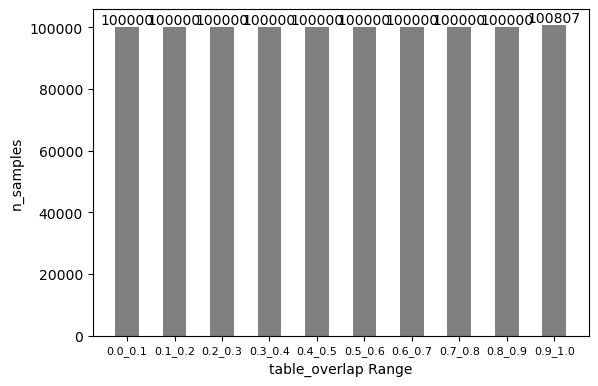

In [3]:
plot_data_distribution(train, label='table_overlap')

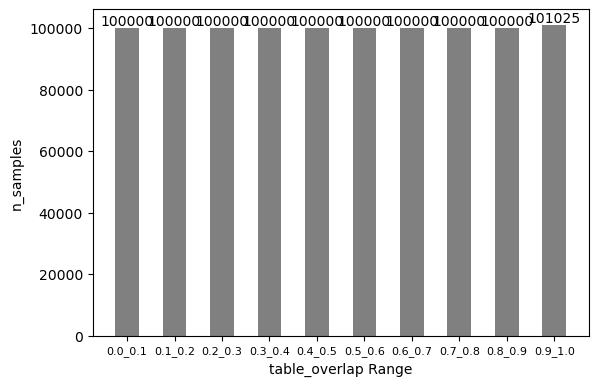

In [4]:
plot_data_distribution(test, label='table_overlap')

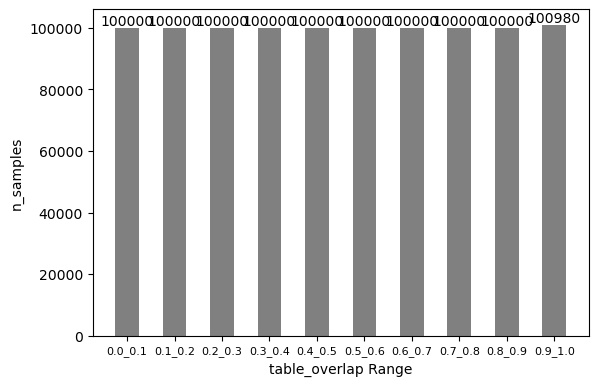

In [5]:
plot_data_distribution(valid, label='table_overlap')

In [2]:
tt = 'Giangrafo Luca'
hash(tt)

-3943134526088901419

In [6]:
hash(str(31))

2294565171690168381

In [8]:
import numpy as np
np.int64(hash(str(31)))

2294565171690168381

In [1]:
from graph import *

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mm = {
    'a':[1,2,3,4,5,6,7,8],
    'b':[9,8,7,6,5,4,3,2],
    'c':[9,8,7,6,5,4,3,2]
}

dd = pd.DataFrame(mm)

In [3]:
dd

,a,b,c
0,1,9,9
1,2,8,8
2,3,7,7
3,4,6,6
4,5,5,5
5,6,4,4
6,7,3,3
7,8,2,2


In [8]:
gg = Graph_Hashed_Node_Embs(dd, 'ff')

NameError: name 'Graph_Hashed_Node_Embs' is not defined

In [9]:
import pandas as pd

In [10]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/raw_files_csv/whole_csv_licensed.zip_P08-1028_swastika_67.csv')

In [11]:
dd

,Citance Number,Reference Article,Citing Article,Citation Marker Offset,Citation Marker,Citation Offset,Citation Text,Citation Text Clean,Reference Offset,Reference Text,Discourse Facet
0,1,P08-1028,D08-1094,0,2008.0,0,Mitchell and Lapata (2008) propose a framework...,Mitchell and Lapata (2008) propose a framework...,21.0,"<S sid=""21"" ssid=""17"">Central in these models ...",Method_Citation
1,2,P08-1028,D08-1094,0,2008.0,0,"In both experiments, we compare the SVS model ...","In both experiments, we compare the SVS model ...",27.0,"<S sid=""27"" ssid=""23"">Our results show that th...",Result_Citation
2,4,P08-1028,P14-1060,0,2008.0,0,While works such asthe SDSM model suffer from ...,While works such as the SDSM model suffer from...,189.0,"<S sid=""189"" ssid=""1"">In this paper we present...",Aim_Citation
3,6,P08-1028,P10-1097,0,2008.0,0,"Mitchell and Lapata (2008), henceforth M& amp;...","Mitchell and Lapata (2008), henceforth M& amp;...",53.0,"<S sid=""53"" ssid=""1"">We formulate semantic com...",Method_Citation
4,7,P08-1028,P10-1097,0,NaN,0,"Interestingly, Mitchell and Lapata (2008) came...","Interestingly, Mitchell and Lapata (2008) came...",NaN,NaN,NaN
5,8,P08-1028,D11-1094,0,2008.0,0,And Mitchell and Lapata (2008) propose a model...,And Mitchell and Lapata (2008) propose a model...,76.0,"<S sid=""76"" ssid=""24"">The models considered so...",Method_Citation
6,9,P08-1028,W11-0131,0,2008.0,0,Mitchell and Lapata (2008) provide a general f...,Mitchell and Lapata (2008) provide a general f...,57.0,"<S sid=""57"" ssid=""5"">Let p denote the composit...",Method_Citation
7,10,P08-1028,W11-0131,0,NaN,0,"As Mitchell and Lapata (2008) did, let us temp...","As Mitchell and Lapata (2008) did, let us temp...",NaN,NaN,NaN
8,11,P08-1028,P13-2083,0,2008.0,0,Mitchell and Lapata (2008) propose a framework...,Mitchell and Lapata (2008) propose a framework...,57.0,"<S sid=""57"" ssid=""5"">Let p denote the composit...",Method_Citation
9,12,P08-1028,P13-2083,0,2008.0,0,"As our final set of baselines, we extend two s...","As our final set of baselines, we extend two s...",190.0,"<S sid=""190"" ssid=""2"">We formulated compositio...",Result_Citation


In [1]:
import pandas as pd

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/performance/1_x_bins_y_MAE/wikitables/455252_52350_52530_labelled.csv')

In [3]:
dd.shape

(52350, 5)

In [4]:
dd

,l_id,r_id,overlap_pred,overlap_true,AE
0,100.90674,599.39969,0.250864,0.416667,0.165802
1,101.98420,349.84227,0.844124,0.690476,0.153648
2,103.11614,442.62098,0.922987,0.944444,0.021457
3,103.33148,175.53169,0.565044,0.333333,0.231710
4,103.33148,295.94386,0.511493,0.333333,0.178159
...,...,...,...,...,...
52345,654.24832,73.32223,0.480696,0.142857,0.337839
52346,654.24832,94.89675,0.000000,0.058824,0.058824
52347,654.24832,94.89675,0.000000,0.058824,0.058824
52348,654.62620,654.62660,0.743865,0.875000,0.131135


In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/t_exec/end_2_end_overlap_comparison/t_execs_compared_seconds_full_sha256.csv')

In [3]:
dd

,id,r_id,s_id,a%,total_time,graphs_generation,embeddings_generation,overlap_computation,total,predicted_overlap,r_rows,r_cols,r_area,s_rows,s_cols,s_area,tot_rows,tot_cols,tot_area
0,0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.030304,0.738977,1.459869,0.000323,2.199174,tensor(0.7932),663,19,12597,622,19,11818,1285,38,24415
1,1,seek_time_csv_licensed.zip_PL2331LAHDHAMJ.csv,seek_time_csv_licensed.zip_PL2331LAHDR9BJ.csv,0.578947,0.006878,0.059531,0.003036,0.000161,0.062731,tensor(0.8276),59,19,1121,59,19,1121,118,38,2242
2,2,then_csv_licensed.zip_03-04_703.csv,thing_csv_licensed.zip_03-04_776.csv,0.818182,0.003441,0.082913,0.002280,0.000165,0.085362,tensor(1.0000),99,11,1089,99,11,1089,198,22,2178
3,3,real_time_csv_licensed.zip_0203_202927_Initial...,real_time_csv_licensed.zip_0225_050914_Initial...,0.500000,0.000388,0.020423,0.001966,0.000148,0.022540,tensor(0.8973),82,2,164,82,2,164,164,4,328
4,4,in_time_csv_licensed.zip_0222_185053_Initializ...,real_time_csv_licensed.zip_0210_162008_Initial...,0.500000,0.000382,0.020334,0.001861,0.000146,0.022344,tensor(0.9012),82,2,164,82,2,164,164,4,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,in_time_csv_licensed.zip_0201_151017_Initializ...,real_time_csv_licensed.zip_0201_071141_Initial...,0.500000,0.000376,0.020444,0.001891,0.000150,0.022487,tensor(0.8976),82,2,164,82,2,164,164,4,328
199996,199996,in_time_csv_licensed.zip_0209_204722_Initializ...,real_time_csv_licensed.zip_0210_030416_Initial...,0.500000,0.000365,0.020460,0.001884,0.000148,0.022493,tensor(0.8957),82,2,164,82,2,164,164,4,328
199997,199997,id_csv_licensed.zip_PD37107b_lo025.sample.dupm...,id_csv_licensed.zip_PD37237b_lo021.sample.dupm...,0.532632,10.593280,0.102356,0.002317,0.000180,0.104855,tensor(0.8637),100,19,1900,100,19,1900,200,38,3800
199998,199998,in_time_csv_licensed.zip_0204_170739_Initializ...,in_time_csv_licensed.zip_0211_095405_Initializ...,0.500000,0.000459,0.021448,0.002003,0.000152,0.023605,tensor(0.8749),82,2,164,82,2,164,164,4,328


In [4]:
import pickle

with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/graphs_sha256_null_not_0_no_merge_nodes.pkl', 'rb') as f:
    gd = pickle.load(f)

In [2]:
list(gd.keys())[0]

'0.41'

In [5]:
len(gd.keys())

514121

In [6]:
gd

{'0.41': <graph.Graph at 0x7f3672bffa90>,
 '0.109': <graph.Graph at 0x7f3671c30c90>,
 '0.126': <graph.Graph at 0x7f2de4cb4910>,
 '0.191': <graph.Graph at 0x7f3671cae2d0>,
 '0.411': <graph.Graph at 0x7f367013e110>,
 '0.413': <graph.Graph at 0x7f367240bb90>,
 '0.423': <graph.Graph at 0x7f36724ef510>,
 '0.944': <graph.Graph at 0x7f367817b9d0>,
 '0.967': <graph.Graph at 0x7f367150b610>,
 '0.1096': <graph.Graph at 0x7f3671cf45d0>,
 '0.1186': <graph.Graph at 0x7f3672b3ed10>,
 '0.1254': <graph.Graph at 0x7f3671c42bd0>,
 '0.1263': <graph.Graph at 0x7f3671548d50>,
 '0.1294': <graph.Graph at 0x7f367159ad50>,
 '0.1379': <graph.Graph at 0x7f3671c43cd0>,
 '0.1624': <graph.Graph at 0x7f36737e9790>,
 '0.1801': <graph.Graph at 0x7f3673796bd0>,
 '0.2382': <graph.Graph at 0x7f36781633d0>,
 '0.2421': <graph.Graph at 0x7f3678161310>,
 '0.2454': <graph.Graph at 0x7f3670f5a8d0>,
 '0.4002': <graph.Graph at 0x7f3671cf9b10>,
 '0.4009': <graph.Graph at 0x7f3672b61450>,
 '0.4161': <graph.Graph at 0x7f3673e69150>

In [8]:
gd['0.41'].edges.get_device()

0

In [9]:
with open('/home/francesco.pugnaloni/GNNTE/tmp(graph_dict.pkl)', 'rb') as f:
    gdt = pickle.load(f)

In [12]:
gdt['a'].edges.get_device()

-1

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/set_similarities_gittables.csv')

In [3]:
dd

,id,r_id,s_id,jsim,jsim_time,josie,josie_time
0,0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.165625,0.000017,0.306358,0.000005
1,1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.856164,0.000160,0.922509,0.000076
2,2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.419811,0.000018,0.613793,0.000008
3,3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.544164,0.000059,0.770089,0.000027
4,4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.242424,0.000005,1.000000,0.000002
...,...,...,...,...,...,...,...
499995,499995,running_time_csv_licensed.zip_00-01_520.csv,real_time_csv_licensed.zip_21-22_350.csv,0.009363,0.000057,0.024096,0.000021
499996,499996,rate_of_return_csv_licensed.zip_03-04_111.csv,reaction_time_csv_licensed.zip_13-14_109.csv,0.006012,0.000070,0.012270,0.000019
499997,499997,then_csv_licensed.zip_10-11_1084.csv,question_time_csv_licensed.zip_19-20_441.csv,0.007527,0.000072,0.016867,0.000021
499998,499998,question_time_csv_licensed.zip_06-07_623.csv,whole_csv_licensed.zip_06-07_429.csv,0.015850,0.000041,0.034056,0.000011


In [4]:
dd.describe()

,id,jsim,jsim_time,josie,josie_time
count,500000.000000,500000.000000,5.000000e+05,500000.000000,5.000000e+05
mean,249999.500000,0.428709,6.425807e-03,0.571244,2.282423e-03
std,144337.711634,0.319267,3.237312e+00,0.329259,1.174304e+00
min,0.000000,0.000000,7.152557e-07,0.000000,4.768372e-07
25%,124999.750000,0.120968,1.335144e-05,0.264206,4.291534e-06
50%,249999.500000,0.420091,3.719330e-05,0.636364,1.096725e-05
75%,374999.250000,0.698113,1.432896e-04,0.871212,5.483627e-05
max,499999.000000,1.000000,2.288998e+03,1.000000,8.303372e+02


In [5]:
dk = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/train.csv')

In [6]:
dd.head()

,id,r_id,s_id,jsim,jsim_time,josie,josie_time
0,0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.165625,0.000017,0.306358,0.000005
1,1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.856164,0.000160,0.922509,0.000076
2,2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.419811,0.000018,0.613793,0.000008
3,3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.544164,0.000059,0.770089,0.000027
4,4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.242424,0.000005,1.000000,0.000002


In [7]:
dk.head()

,r_id,s_id,a%
0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000
1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.818182
2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.500000
3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.724490
4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.457143


In [10]:
for r in range(dk.shape[0]):
    if(dk.iloc[r]['r_id']!=dd.iloc[r]['r_id']) or (dk.iloc[r]['s_id']!=dd.iloc[r]['s_id']):
        print('not same order')
        break
print('Ok!')

Ok!


In [11]:
dd['a%'] = dk['a%']

In [12]:
dd

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%
0,0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.165625,0.000017,0.306358,0.000005,0.160000
1,1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.856164,0.000160,0.922509,0.000076,0.818182
2,2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.419811,0.000018,0.613793,0.000008,0.500000
3,3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.544164,0.000059,0.770089,0.000027,0.724490
4,4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.242424,0.000005,1.000000,0.000002,0.457143
...,...,...,...,...,...,...,...,...
499995,499995,running_time_csv_licensed.zip_00-01_520.csv,real_time_csv_licensed.zip_21-22_350.csv,0.009363,0.000057,0.024096,0.000021,0.428422
499996,499996,rate_of_return_csv_licensed.zip_03-04_111.csv,reaction_time_csv_licensed.zip_13-14_109.csv,0.006012,0.000070,0.012270,0.000019,0.409541
499997,499997,then_csv_licensed.zip_10-11_1084.csv,question_time_csv_licensed.zip_19-20_441.csv,0.007527,0.000072,0.016867,0.000021,0.404656
499998,499998,question_time_csv_licensed.zip_06-07_623.csv,whole_csv_licensed.zip_06-07_429.csv,0.015850,0.000041,0.034056,0.000011,0.440771


In [15]:
dd['ae_jsim'] = np.absolute(dd['jsim'] - dd['a%'])
dd['ae_josie'] = np.absolute(dd['josie'] - dd['a%'])

In [16]:
dd

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,ae_jsim,ae_josie
0,0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.165625,0.000017,0.306358,0.000005,0.160000,0.005625,0.146358
1,1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.856164,0.000160,0.922509,0.000076,0.818182,0.037983,0.104327
2,2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.419811,0.000018,0.613793,0.000008,0.500000,0.080189,0.113793
3,3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.544164,0.000059,0.770089,0.000027,0.724490,0.180326,0.045599
4,4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.242424,0.000005,1.000000,0.000002,0.457143,0.214719,0.542857
...,...,...,...,...,...,...,...,...,...,...
499995,499995,running_time_csv_licensed.zip_00-01_520.csv,real_time_csv_licensed.zip_21-22_350.csv,0.009363,0.000057,0.024096,0.000021,0.428422,0.419059,0.404326
499996,499996,rate_of_return_csv_licensed.zip_03-04_111.csv,reaction_time_csv_licensed.zip_13-14_109.csv,0.006012,0.000070,0.012270,0.000019,0.409541,0.403529,0.397271
499997,499997,then_csv_licensed.zip_10-11_1084.csv,question_time_csv_licensed.zip_19-20_441.csv,0.007527,0.000072,0.016867,0.000021,0.404656,0.397129,0.387789
499998,499998,question_time_csv_licensed.zip_06-07_623.csv,whole_csv_licensed.zip_06-07_429.csv,0.015850,0.000041,0.034056,0.000011,0.440771,0.424921,0.406716


In [17]:
dd.describe()

,id,jsim,jsim_time,josie,josie_time,a%,ae_jsim,ae_josie
count,500000.000000,500000.000000,5.000000e+05,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000
mean,249999.500000,0.428709,6.425807e-03,0.571244,2.282423e-03,0.498603,0.158072,0.174459
std,144337.711634,0.319267,3.237312e+00,0.329259,1.174304e+00,0.289968,0.139453,0.169653
min,0.000000,0.000000,7.152557e-07,0.000000,4.768372e-07,0.000000,0.000000,0.000000
25%,124999.750000,0.120968,1.335144e-05,0.264206,4.291534e-06,0.250000,0.041705,0.055115
50%,249999.500000,0.420091,3.719330e-05,0.636364,1.096725e-05,0.499979,0.124681,0.120266
75%,374999.250000,0.698113,1.432896e-04,0.871212,5.483627e-05,0.727273,0.252044,0.253183
max,499999.000000,1.000000,2.288998e+03,1.000000,8.303372e+02,1.000000,1.000000,1.000000


In [2]:
data = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/t_exec/end_2_end_overlap_comparison/t_execs_compared_seconds_full_100tokens_with_test_repeated_for_cossim.csv')

In [3]:
data.describe()

,id,a%,total_time,graphs_generation,embeddings_generation,overlap_computation,total,r_rows,r_cols,r_area,s_rows,s_cols,s_area,tot_rows,tot_cols,tot_area,overlap_computations_repeated,overlap_computations_no_read
count,200000.000000,199389.000000,199389.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,0.603910,2.135047,0.220319,0.004657,0.000493,0.225472,219.430750,13.52640,3230.777785,214.284500,13.122635,3140.657610,433.715250,26.649035,6371.435395,0.000225,0.000124
std,57735.171256,0.258045,4.776387,0.371036,0.004994,0.000734,0.371984,304.488048,27.51662,5140.043666,293.348164,24.927323,4972.648412,592.169287,44.273639,10072.952432,0.000005,0.000003
min,0.000000,0.001897,0.000073,0.000952,0.001791,0.000141,0.002961,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,0.000218,0.000119
25%,49999.750000,0.500000,0.000434,0.040825,0.002431,0.000180,0.043648,24.000000,2.00000,164.000000,24.000000,2.000000,164.000000,49.000000,4.000000,328.000000,0.000223,0.000123
50%,99999.500000,0.526316,0.001404,0.054255,0.002829,0.000184,0.058642,82.000000,11.00000,300.000000,82.000000,11.000000,288.000000,164.000000,22.000000,665.000000,0.000224,0.000124
75%,149999.250000,0.818182,0.030425,0.304808,0.004834,0.000191,0.309944,262.000000,19.00000,3621.750000,256.000000,19.000000,3624.000000,518.000000,38.000000,7536.000000,0.000225,0.000124
max,199999.000000,1.000000,63.329866,27.095600,1.442903,0.002675,27.098526,6013.000000,592.00000,17228.000000,6013.000000,592.000000,16777.000000,12026.000000,1027.000000,32585.000000,0.001108,0.000728


In [4]:
tg = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv')

In [5]:
tg.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv', index=False)

In [6]:
tg.shape

(100000, 3)

In [7]:
tg.iloc[92616:92620]

,r_id,s_id,a%
92616,real_time_csv_licensed.zip_0203_202927_Initial...,data_rate_csv_licensed.zip_A00-2018_sweta_180.csv,0.000000
92617,seek_time_csv_licensed.zip_PL1331LAHBSN3H.csv,seek_time_csv_licensed.zip_PL1331LAHD5L1H.csv,0.736842
92618,running_time_csv_licensed.zip_J01-2004_121.csv,running_time_csv_licensed.zip_J01-2004_22.csv,0.727273
92619,seek_time_csv_licensed.zip_PL1331LAHDZX7H.csv,seek_time_csv_licensed.zip_PL2331LAHB6W1J.csv,0.684211


In [8]:
data_augm = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_stats_500000.csv')

In [23]:
data_augm

,id,r_id,s_id,a%,total_time
0,0,in_time_csv_licensed.zip_wunderground_1991_06_...,seek_time_csv_licensed.zip_PL1331LAGSH81H.csv,0.068027,0.011464
1,1,show_time_csv_licensed.zip_dictEpisode-363-The...,parent_csv_licensed.zip_Configuration3_window3...,NaN,NaN
2,2,object_csv_licensed.zip_Configuration3_window1...,in_time_csv_licensed.zip_Austin_2020_02_28.csv,0.087121,0.007147
3,3,data_rate_csv_licensed.zip_16-17_149.csv,real_time_csv_licensed.zip_0201_190839_Initial...,NaN,NaN
4,4,quick_time_csv_licensed.zip_recipes_333.csv,id_csv_licensed.zip_encounter_slots_36.csv,0.133333,0.010942
...,...,...,...,...,...
499995,499995,thing_csv_licensed.zip_11-12_1666.csv,question_time_csv_licensed.zip_17-18_202.csv,0.284382,0.003928
499996,499996,id_csv_licensed.zip_0021801118_1.csv,real_time_csv_licensed.zip_CNN.201311_2.csv,0.064885,0.000964
499997,499997,running_time_csv_licensed.zip_episode 3_3.csv,parent_csv_licensed.zip_mdl_question_37.csv,0.045455,0.003140
499998,499998,in_time_csv_licensed.zip_0203_162217_Initializ...,id_csv_licensed.zip_Configuration1_window16_sp...,NaN,NaN


In [24]:
data_augm['a%'] = data_augm['a%'].fillna(0)

In [ ]:
d_0 = data_augm[data_augm['a%']==0]

In [39]:
t_check = d_0.iloc[-2][1:4]

In [40]:
t_check

r_id    real_time_csv_licensed.zip_0203_202927_Initial...
s_id    data_rate_csv_licensed.zip_A00-2018_sweta_180.csv
a%                                                    0.0
Name: 499992, dtype: object

In [44]:
for r in range(tg.shape[0]):
    if ((tg.iloc[r]['r_id']==t_check['r_id']) and (tg.iloc[r]['s_id']==t_check['s_id'])) or ((tg.iloc[r]['r_id']==t_check['s_id']) and (tg.iloc[r]['s_id']==t_check['r_id'])):
        print('nope')
        break
print('ok')

nope
ok


In [42]:
tg.iloc[92616] = d_0.iloc[-2][1:4]

In [25]:
data_augm

,id,r_id,s_id,a%,total_time
0,0,in_time_csv_licensed.zip_wunderground_1991_06_...,seek_time_csv_licensed.zip_PL1331LAGSH81H.csv,0.068027,0.011464
1,1,show_time_csv_licensed.zip_dictEpisode-363-The...,parent_csv_licensed.zip_Configuration3_window3...,0.000000,NaN
2,2,object_csv_licensed.zip_Configuration3_window1...,in_time_csv_licensed.zip_Austin_2020_02_28.csv,0.087121,0.007147
3,3,data_rate_csv_licensed.zip_16-17_149.csv,real_time_csv_licensed.zip_0201_190839_Initial...,0.000000,NaN
4,4,quick_time_csv_licensed.zip_recipes_333.csv,id_csv_licensed.zip_encounter_slots_36.csv,0.133333,0.010942
...,...,...,...,...,...
499995,499995,thing_csv_licensed.zip_11-12_1666.csv,question_time_csv_licensed.zip_17-18_202.csv,0.284382,0.003928
499996,499996,id_csv_licensed.zip_0021801118_1.csv,real_time_csv_licensed.zip_CNN.201311_2.csv,0.064885,0.000964
499997,499997,running_time_csv_licensed.zip_episode 3_3.csv,parent_csv_licensed.zip_mdl_question_37.csv,0.045455,0.003140
499998,499998,in_time_csv_licensed.zip_0203_162217_Initializ...,id_csv_licensed.zip_Configuration1_window16_sp...,0.000000,NaN


In [29]:
d_0.iloc[-2][1:4]

r_id    real_time_csv_licensed.zip_0203_202927_Initial...
s_id    data_rate_csv_licensed.zip_A00-2018_sweta_180.csv
a%                                                    0.0
Name: 499992, dtype: object

In [30]:
tg.iloc[92616] = d_0.iloc[-2][1:4]

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables.csv')

In [3]:
dd

,id,r_id,s_id,jsim,jsim_time,josie,josie_time
0,0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.238009,0.000201,0.462185,0.000061
1,1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.502674,0.000017,0.671429,0.000007
2,2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.175627,0.000015,0.466667,0.000004
3,3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.469388,0.000016,0.647887,0.000006
4,4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.477702,0.000113,0.699749,0.000044
...,...,...,...,...,...,...,...
99995,99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.007246,0.000145,0.016807,0.000045
99996,99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.009901,0.000208,0.023013,0.000052
99997,99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.007913,0.000082,0.016162,0.000027
99998,99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.008878,0.000141,0.018676,0.000048


In [4]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables.csv')

In [5]:
dd

,id,r_id,s_id,jsim,jsim_time,josie,josie_time
0,0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.238009,0.000201,0.462185,0.000061
1,1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.502674,0.000017,0.671429,0.000007
2,2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.175627,0.000015,0.466667,0.000004
3,3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.469388,0.000016,0.647887,0.000006
4,4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.477702,0.000113,0.699749,0.000044
...,...,...,...,...,...,...,...
99995,99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.007246,0.000145,0.016807,0.000045
99996,99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.009901,0.000208,0.023013,0.000052
99997,99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.007913,0.000082,0.016162,0.000027
99998,99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.008878,0.000141,0.018676,0.000048


In [6]:
dd.shape

(100000, 7)

In [7]:
ll = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv')

In [8]:
ll

,r_id,s_id,a%
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868
...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791


In [9]:
for r in tqdm(range(ll.shape[0])):
    if ll.iloc[r]['r_id'] != dd.iloc[r]['r_id'] or ll.iloc[r]['s_id'] != dd.iloc[r]['s_id']:
        print('arg')
        break

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:14<00:00, 7114.13it/s]


In [10]:
ll['jsim'] = dd['jsim']
ll['jsim_time'] = dd['jsim_time']
ll['josie'] = dd['josie']
ll['josie_time'] = dd['josie_time']

In [11]:
ll

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044
...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048


In [12]:
ll.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/baseline.csv' , index=False)

In [13]:
ff = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv')

In [14]:
ff.describe()

,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo
count,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,0.498701,0.459528,2.354115e-03,0.624077,9.285575e-04,0.658750,0.173201
std,0.289637,0.287070,2.706253e-02,0.269061,1.085664e-02,0.248260,0.161680
min,0.000000,0.000000,7.152557e-07,0.000000,4.768372e-07,0.000000,0.000000
25%,0.250000,0.230088,1.311302e-05,0.434342,4.529953e-06,0.482342,0.055705
50%,0.499982,0.420290,3.123283e-05,0.639875,1.120567e-05,0.667788,0.130179
75%,0.727273,0.654377,1.509190e-04,0.863636,5.626678e-05,0.869660,0.236362
max,1.000000,1.000000,1.283983e+00,1.000000,4.834337e-01,1.000000,1.000000


In [15]:
ff

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458
...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911


In [16]:
ff['AE_josie'] = abs(ff['a%']-ff['josie'])

In [17]:
ff

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,AE_josie
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545,0.011499
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729,0.171429
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797,0.152564
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697,0.147887
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458,0.331881
...,...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931,0.371451
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498,0.286465
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337,0.339570
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911,0.367115


In [18]:
ff.describe()

,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,AE_josie
count,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,0.498701,0.459528,2.354115e-03,0.624077,9.285575e-04,0.658750,0.173201,0.175329
std,0.289637,0.287070,2.706253e-02,0.269061,1.085664e-02,0.248260,0.161680,0.177906
min,0.000000,0.000000,7.152557e-07,0.000000,4.768372e-07,0.000000,0.000000,0.000000
25%,0.250000,0.230088,1.311302e-05,0.434342,4.529953e-06,0.482342,0.055705,0.051515
50%,0.499982,0.420290,3.123283e-05,0.639875,1.120567e-05,0.667788,0.130179,0.113636
75%,0.727273,0.654377,1.509190e-04,0.863636,5.626678e-05,0.869660,0.236362,0.246373
max,1.000000,1.000000,1.283983e+00,1.000000,4.834337e-01,1.000000,1.000000,1.000000


In [19]:
kj = ff[ff['a%'] >= 0]

In [20]:
kj = kj[kj['a%']<0.1]

In [21]:
kj.shape

(10000, 10)

In [22]:
kj

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,AE_josie
22,in_time_csv_licensed.zip_weather-2012-09-03_13...,in_time_csv_licensed.zip_weather-2015-04-19_60...,0.094538,0.257329,0.000046,0.422460,0.000017,0.367770,0.273232,0.327922
33,id_csv_licensed.zip_0021500241_4.csv,id_csv_licensed.zip_0021701165.csv,0.095491,0.130435,0.000316,0.291429,0.000089,0.310033,0.214542,0.195938
41,id_csv_licensed.zip_0021800266_8.csv,id_csv_licensed.zip_0021900436.csv,0.068966,0.132812,0.000137,0.300000,0.000061,0.457341,0.388376,0.231034
45,id_csv_licensed.zip_0021501080.csv,id_csv_licensed.zip_0021501133.csv,0.082759,0.102564,0.000242,0.189573,0.000091,0.705422,0.622663,0.106815
49,id_csv_licensed.zip_ability_changelog_prose_33...,seek_time_csv_licensed.zip_PL1331LAHD3H7H.csv,0.051282,0.138462,0.000006,0.285714,0.000002,0.465236,0.413954,0.234432
...,...,...,...,...,...,...,...,...,...,...
97156,id_csv_licensed.zip_boxscore_0021800380.csv,id_csv_licensed.zip_boxscore_0021800414.csv,0.076462,0.106280,0.000410,0.214634,0.000138,0.466783,0.390321,0.138172
97160,id_csv_licensed.zip_0022000601.csv,id_csv_licensed.zip_0022000957.csv,0.079365,0.078300,0.000474,0.195531,0.000132,0.308319,0.228954,0.116166
97181,id_csv_licensed.zip_boxscore_0021500469.csv,id_csv_licensed.zip_boxscore_0021501025.csv,0.091512,0.093394,0.000483,0.179039,0.000178,0.483533,0.392021,0.087527
97184,id_csv_licensed.zip_0021500399.csv,id_csv_licensed.zip_boxscore_0021700368.csv,0.078621,0.097727,0.000395,0.200000,0.000173,0.329820,0.251199,0.121379


In [23]:
kj.describe()

,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,AE_josie
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,0.070881,0.118359,0.002325,0.248219,8.013595e-04,0.473671,0.403211,0.177387
std,0.028516,0.082414,0.020285,0.134744,8.536402e-03,0.164235,0.172269,0.134023
min,0.000000,0.000000,0.000001,0.000000,9.536743e-07,0.000000,0.000000,0.000000
25%,0.066964,0.092066,0.000079,0.187234,2.694130e-05,0.364218,0.287471,0.108453
50%,0.080460,0.112045,0.000233,0.229983,8.034706e-05,0.466005,0.391083,0.149572
75%,0.090517,0.136585,0.000485,0.280000,1.862049e-04,0.574948,0.502731,0.197887
max,0.099806,0.995475,0.434461,1.000000,2.032285e-01,1.000000,1.000000,1.000000


In [9]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv')

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,area_r,area_s,areas_ratio,tot_area,AE_josie,AE_jsim
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545,12597,11818,0.938160,24415,0.011499,0.235675
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729,164,164,1.000000,328,0.171429,0.002674
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797,312,392,0.795918,704,0.152564,0.138475
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697,164,164,1.000000,328,0.147887,0.030612
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458,5328,6144,0.867188,11472,0.331881,0.109834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931,1056,1320,0.800000,2376,0.371451,0.381011
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498,1034,1298,0.796610,2332,0.286465,0.299577
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337,1144,1012,0.884615,2156,0.339570,0.347818
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911,1309,1529,0.856115,2838,0.367115,0.376913


In [10]:
add_table_stats(table_dict='/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_dict_796970_good.pkl', dataset='/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv', outpath='/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv')

Loading table_dict


KeyboardInterrupt: 

In [11]:
mn = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv')

In [12]:
mn

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,area_r,area_s,areas_ratio,tot_area,AE_josie,AE_jsim
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545,12597,11818,0.938160,24415,0.011499,0.235675
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729,164,164,1.000000,328,0.171429,0.002674
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797,312,392,0.795918,704,0.152564,0.138475
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697,164,164,1.000000,328,0.147887,0.030612
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458,5328,6144,0.867188,11472,0.331881,0.109834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931,1056,1320,0.800000,2376,0.371451,0.381011
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498,1034,1298,0.796610,2332,0.286465,0.299577
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337,1144,1012,0.884615,2156,0.339570,0.347818
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911,1309,1529,0.856115,2838,0.367115,0.376913


In [31]:
mn['AE_josie'] = abs(mn['a%']-mn['josie'])

In [32]:
mn['AE_jsim'] = abs(mn['a%']-mn['jsim'])

In [34]:
mn.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv', index=False)

In [13]:
mn

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,area_r,area_s,areas_ratio,tot_area,AE_josie,AE_jsim
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545,12597,11818,0.938160,24415,0.011499,0.235675
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729,164,164,1.000000,328,0.171429,0.002674
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797,312,392,0.795918,704,0.152564,0.138475
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697,164,164,1.000000,328,0.147887,0.030612
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458,5328,6144,0.867188,11472,0.331881,0.109834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931,1056,1320,0.800000,2376,0.371451,0.381011
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498,1034,1298,0.796610,2332,0.286465,0.299577
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337,1144,1012,0.884615,2156,0.339570,0.347818
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911,1309,1529,0.856115,2838,0.367115,0.376913


In [14]:
first_three = mn[mn['a%'] < 0.3]

In [15]:
first_three.shape

(30000, 15)

In [16]:
first_three['areas_ratio'].describe()

count    30000.000000
mean         0.786669
std          0.233185
min          0.001066
25%          0.687943
50%          0.872944
75%          0.961538
max          1.000000
Name: areas_ratio, dtype: float64

In [20]:
first_three['tot_area'].describe()

count    30000.000000
mean      2309.424033
std       2752.735748
min          9.000000
25%        974.000000
50%       1479.000000
75%       2310.000000
max      32319.000000
Name: tot_area, dtype: float64

In [17]:
mn['areas_ratio'].describe()

count    100000.000000
mean          0.869553
std           0.203251
min           0.001066
25%           0.818182
50%           0.966565
75%           1.000000
max           1.000000
Name: areas_ratio, dtype: float64

In [19]:
mn['tot_area'].describe()

count    100000.000000
mean       4221.617280
std        7548.313234
min           5.000000
25%         374.000000
50%        1350.000000
75%        2634.000000
max       32319.000000
Name: tot_area, dtype: float64

In [4]:
df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv')

In [3]:
df

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,area_r,area_s,areas_ratio,tot_area,AE_josie,AE_jsim
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545,12597,11818,0.938160,24415,0.011499,0.235675
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729,164,164,1.000000,328,0.171429,0.002674
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797,312,392,0.795918,704,0.152564,0.138475
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697,164,164,1.000000,328,0.147887,0.030612
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458,5328,6144,0.867188,11472,0.331881,0.109834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931,1056,1320,0.800000,2376,0.371451,0.381011
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498,1034,1298,0.796610,2332,0.286465,0.299577
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337,1144,1012,0.884615,2156,0.339570,0.347818
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911,1309,1529,0.856115,2838,0.367115,0.376913


In [4]:
def plot_box_group(df: pd.DataFrame, label_list: list, label_y: str='AE') -> None:
    plt.figure(figsize=(8, 6))
    df[label_list].boxplot(showfliers=False, whis=[0, 100], showmeans=True, meanline=True, medianprops=dict(color='black'), boxprops=dict(color='black'), whiskerprops=dict(color='black'))    
    plt.ylabel(label_y)
    plt.grid(False)
    plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_box_group(df: pd.DataFrame, label_list: list, label_y: str='AE') -> None:
    plt.figure(figsize=(8, 6))
    ax = df[label_list].boxplot(showfliers=False, whis=[0, 100], showmeans=True, meanline=True, medianprops=dict(color='black'), boxprops=dict(color='black'), whiskerprops=dict(color='black'))    
    
    # Add mean values as numbers above the box plots
    means = df[label_list].mean()
    for i, mean in enumerate(means):
        ax.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom', color='green')

    plt.ylabel(label_y)
    plt.grid(False)
    plt.show()

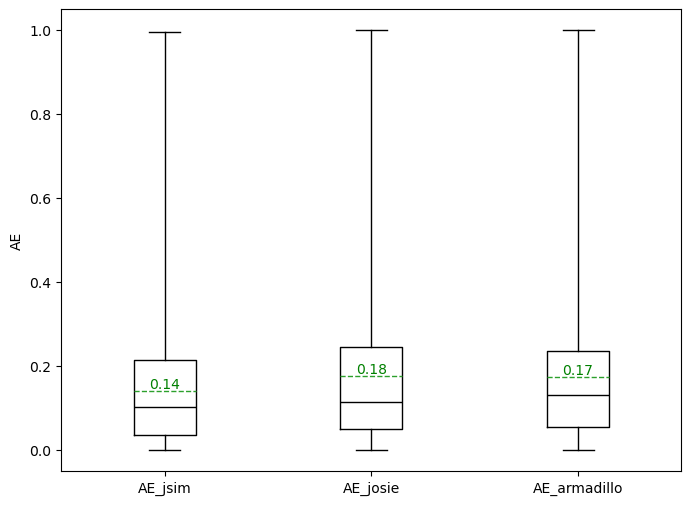

In [6]:
plot_box_group(df, label_list=['AE_jsim', 'AE_josie', 'AE_armadillo'])

In [26]:
df[['AE_armadillo', 'AE_josie','AE_jsim']].mean()

AE_armadillo    0.173201
AE_josie        0.175329
AE_jsim         0.141058
dtype: float64

In [2]:
def print_hist_bins(d: dict):
    # keys = list(d.keys())
    # values = list(d.values())
    
    bar_width = 0.5
    
    # Create the bar plot
    for keys, values in d.items():
        print(f'{keys}:{values}')
        plt.bar(keys, values, width=bar_width, color='grey')
    
    for i, v in enumerate(values):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    plt.xticks(ha='center', fontsize=8)  # Ruota le etichette sull'asse x di 45 gradi
    plt.subplots_adjust(bottom=0.2) 

    plt.xlabel('Dictionaries')
    plt.ylabel('AE')
    
    plt.show()

def show_mae_per_bin_baseline_comparison(data: str | pd.DataFrame, x_label: str) -> None:
    if isinstance(data, str):
        data = pd.read_csv(data)
    d = {}
    
    for i in range(1, 11, 1):
        i /= 10
        prev = round(i-0.1, 2)
        t = data[data[x_label] >= prev]
        t = t[t[x_label] < i]
        curr =  f'{prev}_{i}'
        d[curr] = [round(np.mean(t['AE_armadillo']),2), round(np.mean(t['AE_josie']),2), round(np.mean(t['AE_jsim']),2)]
        
    print_hist_bins(d)
    return d
        
        # d[f'ARM_{curr}'] = round(np.mean(t['AE_armadillo']),2)
        # d[f'josie_{curr}'] = round(np.mean(t['AE_josie']),2)
        # d[f'jsim_{curr}'] = round(np.mean(t['AE_jsim']),2)

0.0_0.1:[0.4, 0.18, 0.05]
0.1_0.2:[0.24, 0.34, 0.14]
0.2_0.3:[0.27, 0.35, 0.16]
0.3_0.4:[0.18, 0.28, 0.23]
0.4_0.5:[0.16, 0.16, 0.18]
0.5_0.6:[0.14, 0.12, 0.11]
0.6_0.7:[0.09, 0.11, 0.16]
0.7_0.8:[0.1, 0.1, 0.24]
0.8_0.9:[0.14, 0.1, 0.09]
0.9_1.0:[0.06, 0.08, 0.13]


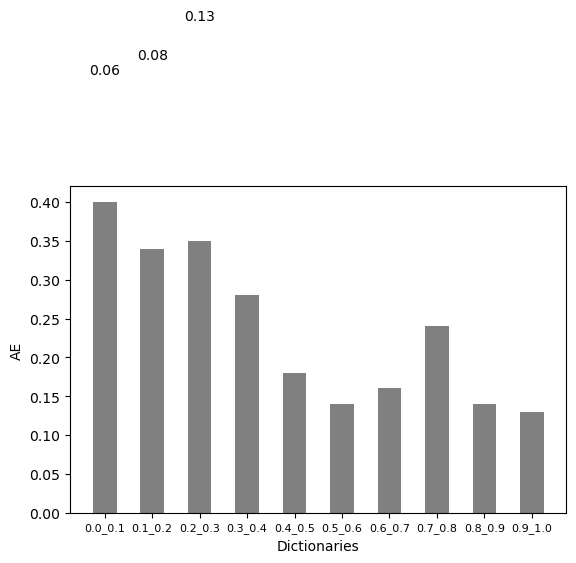

In [24]:
d = show_mae_per_bin_baseline_comparison(df, 'a%')

In [25]:
d

{'0.0_0.1': [0.4, 0.18, 0.05],
 '0.1_0.2': [0.24, 0.34, 0.14],
 '0.2_0.3': [0.27, 0.35, 0.16],
 '0.3_0.4': [0.18, 0.28, 0.23],
 '0.4_0.5': [0.16, 0.16, 0.18],
 '0.5_0.6': [0.14, 0.12, 0.11],
 '0.6_0.7': [0.09, 0.11, 0.16],
 '0.7_0.8': [0.1, 0.1, 0.24],
 '0.8_0.9': [0.14, 0.1, 0.09],
 '0.9_1.0': [0.06, 0.08, 0.13]}

In [81]:
def plot_bar(label, values):
    # Plot a bar diagram
    colors = ['orange', 'grey', 'blue']
    bars = plt.bar(range(len(values)), values, tick_label=[label]*len(values), color=colors)
    
    # Add labels and title
    plt.xlabel('Label')
    plt.ylabel('Values')
    plt.legend(bars, ['Armadillo', 'Overlap set similarity', 'Jaccard similarity'])
    # Show plot
    plt.show()

def plot_hist(label, values):
    # Plot a bar diagram
    colors = ['orange', 'grey', 'blue']

    bars_arm = plt.hist(range(len(list(values[0]))), list(values[0]), tick_label=[label]*len(values), color='orange', rwidth=0.5)
    bars_josie = plt.hist(range(len(list(values[1]))), list(values[1]), tick_label=[label]*len(values), color='grey', rwidth=0.5)
    bars_jsim = plt.hist(range(len(list(values[2]))), list(values[2]), tick_label=[label]*len(values), color='blue', rwidth=0.5)
    
    # Add labels and title
    plt.xlabel('Label')
    plt.ylabel('Values')
    # plt.legend(bars, ['Armadillo', 'Overlap set similarity', 'Jaccard similarity'])
    # Show plot
    plt.show()

In [83]:
plot_hist('0.1_0.2', d['0.0_0.1'])

TypeError: 'numpy.float64' object is not iterable

In [26]:
m = {'0.1_0.2':d['0.1_0.2']}

In [27]:
m

{'0.1_0.2': [0.24, 0.34, 0.14]}

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

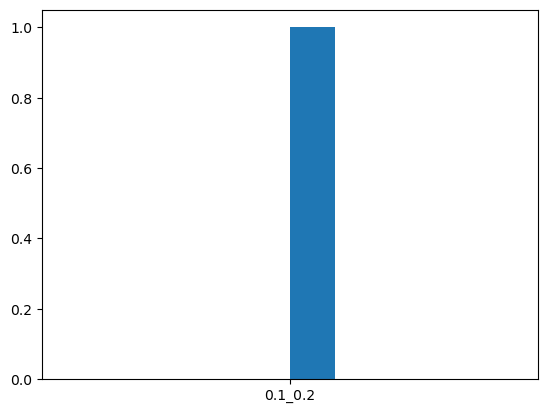

In [29]:
plt.hist(m)

In [5]:
df

,r_id,s_id,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,AE_armadillo,area_r,area_s,areas_ratio,tot_area,AE_josie,AE_jsim
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.238009,0.000201,0.462185,0.000061,0.642229,0.168545,12597,11818,0.938160,24415,0.011499,0.235675
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.502674,0.000017,0.671429,0.000007,0.683729,0.183729,164,164,1.000000,328,0.171429,0.002674
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.175627,0.000015,0.466667,0.000004,0.551899,0.237797,312,392,0.795918,704,0.152564,0.138475
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.469388,0.000016,0.647887,0.000006,0.706697,0.206697,164,164,1.000000,328,0.147887,0.030612
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,0.477702,0.000113,0.699749,0.000044,0.541326,0.173458,5328,6144,0.867188,11472,0.331881,0.109834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.007246,0.000145,0.016807,0.000045,0.482189,0.093931,1056,1320,0.800000,2376,0.371451,0.381011
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.009901,0.000208,0.023013,0.000052,0.582975,0.273498,1034,1298,0.796610,2332,0.286465,0.299577
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.007913,0.000082,0.016162,0.000027,0.396068,0.040337,1144,1012,0.884615,2156,0.339570,0.347818
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.008878,0.000141,0.018676,0.000048,0.597702,0.211911,1309,1529,0.856115,2838,0.367115,0.376913


In [43]:
def compare_models_hist(data: pd.DataFrame | str, bin_criterion: str='a%', bins_name: str='AE') -> None:
    """Function to plot an histogram to compare performances of different models depending on their range of error 

    Args:
        data (pd.DataFrame | str): data frame containing the results
        bin_criterion (str, optional): parameter to generate the 10 bins, must be with values in [0,1]. Defaults to 'a%'.
        bins_name (str, optional): name of the bins. Defaults to 'AE'.
    """
    if isinstance(data, str):
        data = pd.read_csv(data)

    ranges = f'{bins_name}_Range' 
    new_data = {
        ranges:[],
        'Approach':[],
        'MAE':[]
    }
    for i in range(1, 11, 1):
        i /= 10
        prev = round(i-0.1, 2)
        t = data[data[bin_criterion] >= prev]
        t = t[t[bin_criterion] < i]
        
        #curr =  f'{prev}_{i}'
        #curr =  f'[{prev},{i}]'
        curr =  f'{prev},{i}'

        new_data['Approach'].append('Armadillo')
        new_data[ranges].append(curr)
        new_data['MAE'].append(round(np.mean(t['AE_armadillo']),2))

        new_data['Approach'].append('Overlap Set Similarity')
        new_data[ranges].append(curr)
        new_data['MAE'].append(round(np.mean(t['AE_josie']),2))

        new_data['Approach'].append('Jaccard Similarity')
        new_data[ranges].append(curr)
        new_data['MAE'].append(round(np.mean(t['AE_jsim']),2))
    
    df = pd.DataFrame(new_data)
    sns.set_theme(font_scale=0.7, style="whitegrid")
    sns.barplot(data=df, x=ranges, y='MAE', hue='Approach')

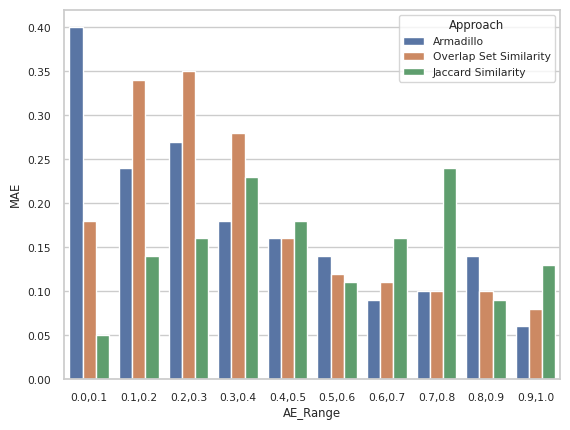

In [44]:
compare_models_hist(df)

In [45]:
dld = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/t_exec/end_2_end_overlap_comparison/t_execs_compared_seconds_full_sha256.csv')

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from data_visualization import *
from _performance_overlap_computation import *

In [3]:
results = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/baseline_performances/test_set_similarities_gittables_with_armadillo_predictions.csv')

In [4]:
times = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/evaluation_data_paper/test_times.csv')

In [5]:
times

,r_id,s_id,a%,total_time
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.030304
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.000382
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.000845
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.000364
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,19.989065
...,...,...,...,...
99995,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.003641
99996,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.003602
99997,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.003522
99998,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.004291


In [6]:
indexes = []
for r in range(times.shape[0]):
    if pd.isna(times.iloc[r]['total_time']):
        indexes.append(r)

In [7]:
len(indexes)

518

In [8]:
results.drop(indexes).describe()

,a%,jsim,jsim_time,josie,josie_time,overlap_armadillo,area_r,area_s,areas_ratio,tot_area,AE_josie,AE_jsim,AE_armadillo
count,99482.000000,99482.000000,9.948200e+04,99482.000000,9.948200e+04,99482.000000,99482.000000,99482.000000,99482.000000,99482.000000,99482.000000,99482.000000,99482.000000
mean,0.501298,0.461017,2.214165e-03,0.626056,8.737272e-04,0.531535,2128.998693,2095.126867,0.870770,4224.125560,0.174972,0.140888,0.088621
std,0.288140,0.286377,2.640574e-02,0.267288,1.055099e-02,0.328017,3843.703204,3761.639794,0.201896,7552.818468,0.176690,0.135610,0.102698
min,0.001897,0.000245,7.152557e-07,0.000861,4.768372e-07,0.000000,3.000000,2.000000,0.001233,5.000000,0.000000,0.000000,0.000000
25%,0.250000,0.232143,1.311302e-05,0.436364,4.529953e-06,0.247045,187.000000,187.000000,0.818565,374.000000,0.052240,0.036503,0.012110
50%,0.500000,0.421348,3.123283e-05,0.641304,1.120567e-05,0.521681,696.000000,660.000000,0.967742,1342.000000,0.113636,0.102480,0.059260
75%,0.727273,0.657143,1.492500e-04,0.864407,5.602837e-05,0.801454,1309.000000,1320.000000,1.000000,2633.000000,0.246138,0.214876,0.132488
max,1.000000,1.000000,1.283983e+00,1.000000,4.834337e-01,1.000000,16074.000000,16264.000000,1.000000,32148.000000,0.949704,0.958785,0.975000


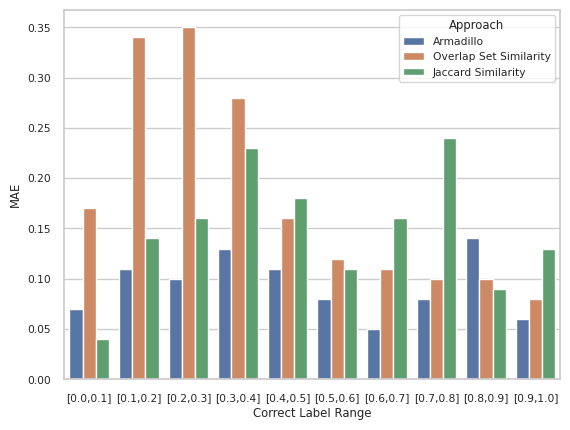

In [9]:
compare_models_hist(results.drop(indexes))

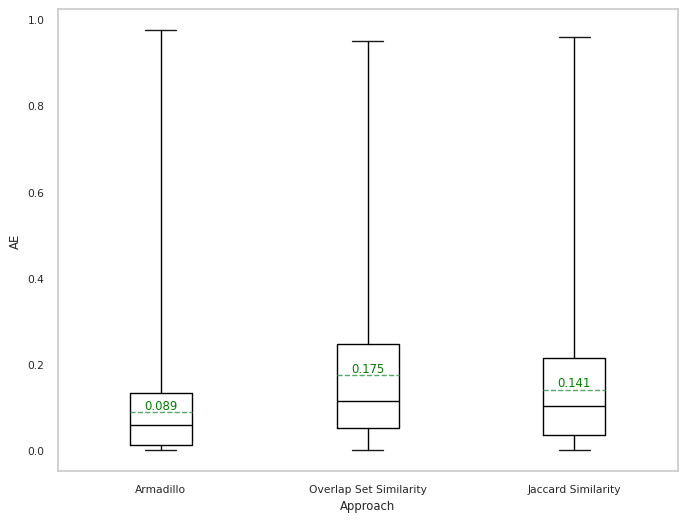

In [10]:
plot_box_group(results.drop(indexes), label_list=['AE_armadillo', 'AE_josie','AE_jsim', ])

In [3]:
import pandas as pd
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/test.csv')

,r_id,s_id,table_overlap
0,100.90674,599.39969,0.416667
1,101.98420,349.84227,0.690476
2,103.11614,442.62098,0.944444
3,103.33148,175.53169,0.333333
4,103.33148,295.94386,0.333333
...,...,...,...
52345,654.24832,73.32223,0.142857
52346,654.24832,94.89675,0.058824
52347,654.24832,94.89675,0.058824
52348,654.62620,654.62660,0.875000


In [5]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/tmp/plot_data_eff_mae_crossed_wiki.csv').describe()

,r_id,s_id,table_overlap,overlap_armadillo,AE_armadillo
count,52350.000000,52350.000000,52350.000000,52350.000000,52350.000000
mean,320.931241,381.926798,0.443255,0.434520,0.230532
std,134.893108,150.106871,0.319693,0.372940,0.218220
min,0.870500,3.130530,0.002252,0.000000,0.000004
25%,214.327450,306.539505,0.145455,0.086309,0.072044
50%,332.420170,405.132982,0.333333,0.320576,0.155248
75%,423.799170,485.306760,0.791209,0.840847,0.312797
max,654.626200,654.626600,0.997867,1.000000,0.991597


In [3]:
dff

,r_id,s_id,table_overlap,overlap_armadillo,AE_armadillo,overlap_true
0,100.90674,599.39969,0.416667,0.227077,0.189589,0.416667
1,101.98420,349.84227,0.690476,0.033860,0.656616,0.690476
2,103.11614,442.62098,0.944444,0.998951,0.054507,0.944444
3,103.33148,175.53169,0.333333,0.306653,0.026680,0.333333
4,103.33148,295.94386,0.333333,0.260699,0.072635,0.333333
...,...,...,...,...,...,...
52345,654.24832,73.32223,0.142857,0.074885,0.067972,0.142857
52346,654.24832,94.89675,0.058824,0.384087,0.325263,0.058824
52347,654.24832,94.89675,0.058824,0.384087,0.325263,0.058824
52348,654.62620,654.62660,0.875000,0.597715,0.277285,0.875000


Bin: 0.1        n_samples:6689      MAE:0.1551184985325421
Bin: 0.2        n_samples:10531      MAE:0.18169942497883557
Bin: 0.3        n_samples:6512      MAE:0.23884692315745762
Bin: 0.4        n_samples:5221      MAE:0.2476379090950057
Bin: 0.5        n_samples:1873      MAE:0.3051048312749204
Bin: 0.6        n_samples:1949      MAE:0.32263205620828345
Bin: 0.7        n_samples:3004      MAE:0.3086029226769871
Bin: 0.8        n_samples:3576      MAE:0.2889091954293626
Bin: 0.9        n_samples:5805      MAE:0.251634579146954
Bin: 1.0        n_samples:7190      MAE:0.2291791335253617


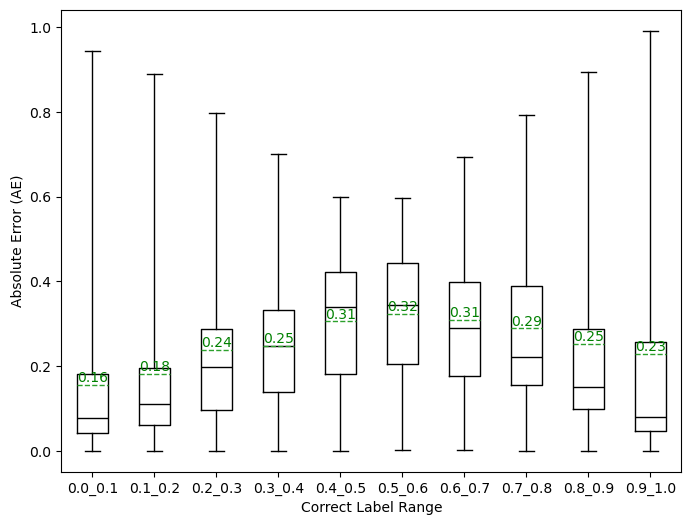

In [6]:
dff=pd.read_csv('/home/francesco.pugnaloni/GNNTE/tmp/plot_data_eff_mae_crossed_wiki.csv')
dff['overlap_true'] = dff['table_overlap']
dff['AE'] = dff['AE_armadillo']
show_mae_per_bin(dff, box=True)


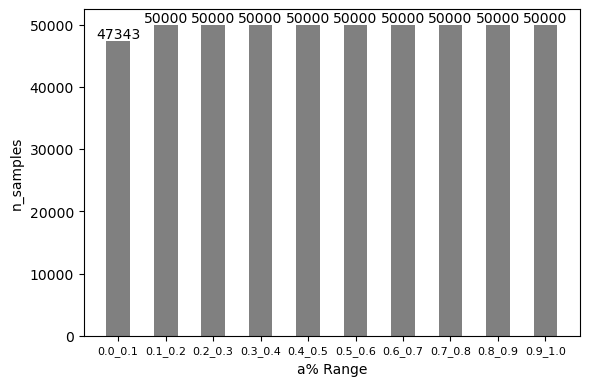

In [14]:
plot_data_distribution(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_filtered.csv'))

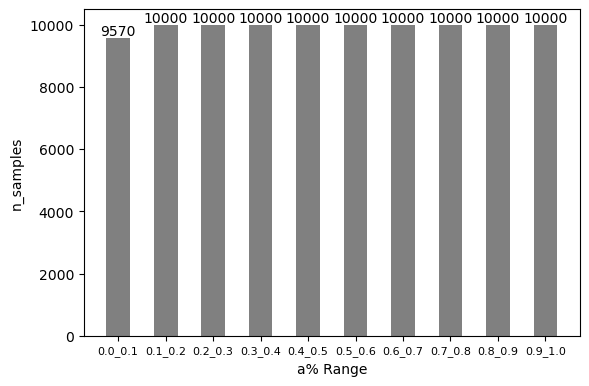

In [11]:
plot_data_distribution(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/test_filtered.csv'))

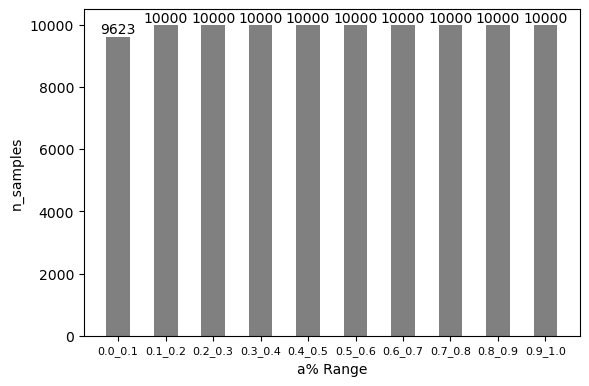

In [13]:
plot_data_distribution(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/valid_filtered.csv'))

In [15]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/valid_filtered.csv')

,r_id,s_id,a%,total_time
0,id_csv_licensed.zip_ir.model.access_37492.csv,id_csv_licensed.zip_ir.model.access_37824.csv,1.000000,0.000401
1,seek_time_csv_licensed.zip_PL2331LAGM42EJ.csv,seek_time_csv_licensed.zip_PL2331LAGN6VUJ.csv,0.526316,0.031017
2,in_time_csv_licensed.zip_KathyBook.csv,running_time_csv_licensed.zip_exercise_2.csv,0.054688,0.058959
3,id_csv_licensed.zip_7254.csv,id_csv_licensed.zip_7301_3.csv,0.250000,0.000720
4,parent_csv_licensed.zip_W99-0623_211.csv,show_time_csv_licensed.zip_W99-0623_swastika_5...,0.727273,0.000879
...,...,...,...,...
99618,running_time_csv_licensed.zip_19-20_354.csv,running_time_csv_licensed.zip_15-16_118.csv,0.316206,0.003737
99619,lead_time_csv_licensed.zip_20-21_214.csv,living_thing_csv_licensed.zip_16-17_81.csv,0.357576,0.003708
99620,crime_rate_csv_licensed.zip_09-10_77.csv,object_csv_licensed.zip_09-10_311.csv,0.322209,0.004034
99621,reaction_time_csv_licensed.zip_00-01_33.csv,living_thing_csv_licensed.zip_18-19_64.csv,0.307918,0.002794


In [17]:
tt = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/test_stats_data_augmentation_seeds.csv')

In [18]:
tt[tt['a%'] < 1]

,id,r_id,s_id,seeds,a%,total_time
0,0,in_time_csv_licensed.zip_wunderground_1991_06_...,seek_time_csv_licensed.zip_PL1331LAGSH81H.csv,12,0.068027,0.011464
2,2,object_csv_licensed.zip_Configuration3_window1...,in_time_csv_licensed.zip_Austin_2020_02_28.csv,21,0.087121,0.007147
4,4,quick_time_csv_licensed.zip_recipes_333.csv,id_csv_licensed.zip_encounter_slots_36.csv,16,0.133333,0.010942
5,5,thing_csv_licensed.zip_21-22_472.csv,abstraction_csv_licensed.zip_20-21_51.csv,14,0.377622,0.005432
6,6,dead_air_csv_licensed.zip_2018-11-17-events_43...,id_csv_licensed.zip_0021600093_1.csv,26,0.031250,0.055181
...,...,...,...,...,...,...
499994,499994,object_csv_licensed.zip_JJ-object-qald9-PreObj...,beats_per_minute_csv_licensed.zip_12-13_6.csv,21,0.123077,0.004110
499995,499995,thing_csv_licensed.zip_11-12_1666.csv,question_time_csv_licensed.zip_17-18_202.csv,15,0.284382,0.003928
499996,499996,id_csv_licensed.zip_0021801118_1.csv,real_time_csv_licensed.zip_CNN.201311_2.csv,13,0.064885,0.000964
499997,499997,running_time_csv_licensed.zip_episode 3_3.csv,parent_csv_licensed.zip_mdl_question_37.csv,20,0.045455,0.003140


In [2]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/graph_dict.pkl', 'rb') as f:
    gd = pickle.load(f)

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ll = list(gd.keys())

In [4]:
gd[ll[0]]

In [9]:
gd[ll[3]].X.shape

torch.Size([350, 32])